 Import packages and load datasets

In [166]:
# Import packagaes and load data
import pandas as pd
import numpy as np

k = 8
period = 30

df = pd.read_csv('data.csv',index_col = 0)
df.index = np.arange(len(df))
df

,Date,start hour,start min,end hour,end min,Activity
0,2010-11-04,0,3,5,40,Sleeping
1,2010-11-04,5,40,5,43,Bed_to_Toilet
2,2010-11-04,5,43,8,1,Sleeping
3,2010-11-04,8,11,8,35,Meal_Preparation
4,2010-11-04,9,29,9,34,Relax
5,2010-11-04,9,34,9,44,Housekeeping
6,2010-11-04,9,48,9,56,Meal_Preparation
7,2010-11-04,9,56,10,2,Eating
8,2010-11-04,10,3,10,4,Wash_Dishes
9,2010-11-04,11,29,11,33,Housekeeping


Functions for grabbing dataset of desired sequence length ranges

In [167]:
# Dictionary for activity label to integer conversion
activities = list(df['Activity'].unique())
act_to_ix = {activity:index for index, activity in enumerate(sorted(activities))}

# Encodes activity label into integer for a dataframe
def activity_encoder(dataframe):
    data = []
    for i in range(len(dataframe)):
        data.append(act_to_ix[dataframe.iloc[i]['Activity']])
    dataframe['Activity'] = data
    return dataframe

df = activity_encoder(df)
print('The number of days :',df['Date'].nunique())
df

The number of days : 189


,Date,start hour,start min,end hour,end min,Activity
0,2010-11-04,0,3,5,40,7
1,2010-11-04,5,40,5,43,0
2,2010-11-04,5,43,8,1,7
3,2010-11-04,8,11,8,35,5
4,2010-11-04,9,29,9,34,6
5,2010-11-04,9,34,9,44,3
6,2010-11-04,9,48,9,56,5
7,2010-11-04,9,56,10,2,1
8,2010-11-04,10,3,10,4,8
9,2010-11-04,11,29,11,33,3


Each instance (activity sequence) of data is one day. Thus, split the data by splitting the dates

In [168]:
from sklearn.model_selection import KFold,train_test_split

def kfold_split(dates,k):
    train_dates = []
    validation_dates = []
    train_cross_dates,test_dates = train_test_split(dates,test_size=0.2,random_state=5)
    print(train_cross_dates.shape)
    kf = KFold(n_splits=k,shuffle=True,random_state=404)
    print(kf)
    kf.get_n_splits(train_cross_dates)
    for train_index,validation_index in kf.split(train_cross_dates):
        train_dates.append(dates[train_index])
        validation_dates.append(dates[validation_index])
    return np.array(train_dates),np.array(validation_dates),np.array(test_dates)
dates = df['Date'].unique()
train_dates,normal_val_dates,normal_test_dates = kfold_split(dates,k)
print(train_dates.shape)
print(normal_val_dates.shape)
print(normal_test_dates.shape)

(151,)
KFold(n_splits=8, random_state=404, shuffle=True)
(8,)
(8,)
(38,)


In [169]:
print('train_dates :',train_dates)
print('train_dates shape',train_dates.shape)
for i in range(len(train_dates)):
    print(len(train_dates[i]))
for i in range(len(normal_val_dates)):
    print(len(normal_val_dates[i]))

train_dates : [array(['2010-11-04', '2010-11-05', '2010-11-06', '2010-11-11',
       '2010-11-12', '2010-11-13', '2010-11-14', '2010-11-15',
       '2010-11-16', '2010-11-17', '2010-11-18', '2010-11-20',
       '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
       '2010-11-26', '2010-11-28', '2010-11-29', '2010-12-01',
       '2010-12-02', '2010-12-03', '2010-12-04', '2010-12-07',
       '2010-12-08', '2010-12-09', '2010-12-10', '2010-12-11',
       '2010-12-12', '2010-12-13', '2010-12-14', '2010-12-15',
       '2010-12-18', '2010-12-19', '2010-12-21', '2010-12-22',
       '2010-12-23', '2010-12-24', '2010-12-25', '2010-12-26',
       '2010-12-27', '2010-12-28', '2010-12-29', '2011-01-01',
       '2011-01-02', '2011-01-03', '2011-01-06', '2011-01-07',
       '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
       '2011-01-12', '2011-01-13', '2011-01-14', '2011-01-15',
       '2011-01-16', '2011-01-17', '2011-01-18', '2011-01-19',
       '2011-01-20', '2011-01-21', '2011

This function is for creating database from training data

In [170]:
def create_database(Df,period):
    Df.index  = np.arange(len(Df))
    num_category = int(24*60/period)
    temp = [[] for _ in range(num_category)]
    for i in range(len(Df)):
        start_index = 2*Df['start hour'][i] + 0*(Df['start min'][i]<period) + 1*(Df['start min'][i]>=period)
        end_index = 2*Df['end hour'][i] + 0*(Df['end min'][i]<period) + 1*(Df['end min'][i]>=period)
        if (end_index - start_index) > 0:
            for j in range(start_index,end_index+1):
                temp[j].append(Df['Activity'][i])
        elif (end_index - start_index) < 0:
            for j in range(start_index,num_category):
                temp[j].append(Df['Activity'][i])
        else:
            temp[start_index].append(Df['Activity'][i])
        database = {}
        for i in range(len(temp)):
            database[i] = list(set(temp[i]))

    return database

In [171]:
print(act_to_ix)
ix_to_act = {v: k for k, v in act_to_ix.items()}
print(ix_to_act)

{'Bed_to_Toilet': 0, 'Eating': 1, 'Enter_Home': 2, 'Housekeeping': 3, 'Leave_Home': 4, 'Meal_Preparation': 5, 'Relax': 6, 'Sleeping': 7, 'Wash_Dishes': 8, 'Work': 9}
{0: 'Bed_to_Toilet', 1: 'Eating', 2: 'Enter_Home', 3: 'Housekeeping', 4: 'Leave_Home', 5: 'Meal_Preparation', 6: 'Relax', 7: 'Sleeping', 8: 'Wash_Dishes', 9: 'Work'}


This function is to calculate percentage of errors daily

In [172]:
def anomaly_score_daily(Df,database,period):
    num_category = int(24*60/period)
    error = 0
    count = 0
    for i in range(len(Df)):
        start_index = 2*Df['start hour'][i] + 0*(Df['start min'][i]<period) + 1*(Df['start min'][i]>=period)
        end_index = 2*Df['end hour'][i] + 0*(Df['end min'][i]<period) + 1*(Df['end min'][i]>=period)

        if (end_index - start_index) > 0:
            for j in range(start_index,end_index+1):
                count+=1
                if not(Df['Activity'][i] in database[j]):
                    error+=1

        elif (end_index-start_index) < 0:
            for j in range(start_index,num_category):
                count+=1
                if not(Df['Activity'][i] in database[j]):
                    error+=1

        
        else:
            count+=1
            if not(Df['Activity'][i] in database[start_index]):
                error+=1
    percentage_of_errors = error/count*100         
    return percentage_of_errors

The function is to create abnormal data by circular shift 4 hours.
This cell also create artificial abnormal validation data.

In [173]:
def create_abnormal(cf,date):
    case1 = cf[cf['Date'] == date ].copy()
    case1.index = np.arange(len(case1))

    case1['start hour']+=4
    case1['end hour']+=4
    if not case1[case1['start hour'] >=24].empty:
        shift = len(case1) - min(case1[case1['start hour'] >=24].index)
        start = case1['start hour'].copy()
        for i in range(len(case1)):
            if start[i] >= 24:
                start[i] += -24
        case1['start hour'] = start
        end = case1['end hour'].copy()
        for i in range(len(case1)):
            if end[i] >= 24:
                end[i] += -24
        case1['end hour'] = end
        case1 = case1.reindex(index=np.roll(case1.index,shift))
    else:
        start = case1['start hour'].copy()
        for i in range(len(case1)):
            if start[i] >= 24:
                start[i] += -24
        case1['start hour'] = start
        end = case1['end hour'].copy()
        for i in range(len(case1)):
            if end[i] >= 24:
                end[i] += -24
        case1['end hour'] = end
        
    case1.index = np.arange(len(case1))
    return case1


Calculating the percentages of errors for different model (different fold of training and validation data)

In [174]:
database_saver = {}
def trainAndValidate(train_dates,normal_val_dates,lf):
    abnormal_val_dates = normal_val_dates[0] 
    print('Abnormal validation dates shape',abnormal_val_dates.shape)
    normal_scores = []
    abnormal_scores = []
    for k in range(len(train_dates)):

        print('For Fold '+str(k)+' :')

        print('Training set size :',train_dates[k].shape)
        train_set = list(train_dates[k])
        #print('Training set :',train_set)
        trainDf = lf[lf['Date'].isin(train_set)].copy()
        trainDf.index = np.arange(len(trainDf))
        print('Train size :', trainDf['Date'].nunique())


        database = create_database(trainDf,period)
        database_saver[k] = database
        n_scores = []
        a_scores = []

        validation_set = normal_val_dates[k]
        print('Validation set size :',validation_set.shape)
        validation_set = list(validation_set)
        #print('Validation set :',validation_set)
        normal_valDf = lf[lf['Date'].isin(validation_set)].copy()
        normal_valDf.index = np.arange(len(normal_valDf))

        for i in range(len(validation_set)):
            cf = normal_valDf[normal_valDf['Date']==validation_set[i]].copy()
            cf.index = np.arange(len(cf))
            n_scores.append(anomaly_score_daily(cf,database,period))
            abnormal_case = create_abnormal(lf,abnormal_val_dates[i])
            a_scores.append(anomaly_score_daily(abnormal_case,database,period))
        normal_scores.append(n_scores)
        abnormal_scores.append(a_scores)
    #normal_scores = np.array(normal_scores)
    #abnormal_scores = np.array(abnormal_scores)
    return normal_scores,abnormal_scores
normal_scores,abnormal_scores = trainAndValidate(train_dates,normal_val_dates,df)

Abnormal validation dates shape (19,)
For Fold 0 :
Training set size : (132,)
Train size : 132
Validation set size : (19,)
For Fold 1 :
Training set size : (132,)
Train size : 132
Validation set size : (19,)
For Fold 2 :
Training set size : (132,)
Train size : 132
Validation set size : (19,)
For Fold 3 :
Training set size : (132,)
Train size : 132
Validation set size : (19,)
For Fold 4 :
Training set size : (132,)
Train size : 132
Validation set size : (19,)
For Fold 5 :
Training set size : (132,)
Train size : 132
Validation set size : (19,)
For Fold 6 :
Training set size : (132,)
Train size : 132
Validation set size : (19,)
For Fold 7 :
Training set size : (133,)
Train size : 133
Validation set size : (18,)


In [175]:
# The scores are not fixed shape matrix due to different
# validation size and training size every K combinations
def unroll_scores(scores):
    unrolled = []
    for array in scores:
        for items in array:
            unrolled.append(items)
    return unrolled

Functions for calculating evaluation metrics

In [176]:
def performance(testloss,testloss2,threshold):
    normal_size = len(testloss)
    abnormal_size = len(testloss2) 
    print('Normal size :',normal_size)
    print('Abnormal size :',abnormal_size)
    count_error = 0
    for i in testloss:
        if i>threshold:
            count_error+=1
    count_error2 = 0
    for j in testloss2:
        if j <= threshold:
            count_error2+=1

    #print('test incorrect',count_error)
    #print('abnormal test incorrect ',count_error2)
    TP = abnormal_size-count_error2 # actual abnormal predicted abnormal
    FN = count_error2 # actual abnormal predicted normal
    FP = count_error # actual normal predicted  abnormal
    TN = normal_size-count_error #actual normal predicted normal
    if (TP+FP) == 0:
        p = 0
    else:
        p = TP/(TP+FP)
    if (TP+FN) == 0:
        r = 0
    else:  
        r = TP/(TP+FN)
    a = (normal_size+abnormal_size- count_error - count_error2)/(normal_size+abnormal_size)
    return p,r,a

Calculate evaluation metrics for different model with different thresholds

In [177]:
unrolled_scores = unroll_scores(normal_scores)
threshold_min = min(unrolled_scores)
threshold_max = max(unrolled_scores)
print('Range of threshold :'+str(threshold_min)+'-'+str(threshold_max))
thresholds = np.linspace(threshold_min,threshold_max,10)
print(thresholds)

def find_best_model(thresholds,normal_scores,abnormal_scores):
    precisions = []
    recalls = [] 
    accuracies = []
    for t in thresholds:
        precision = []
        recall = [] 
        accuracy = []
        for i in range(k):
            p,r,a = performance(normal_scores[i],abnormal_scores[i],t)
            precision.append(p)
            recall.append(r)
            accuracy.append(a)
        precisions.append(precision)
        recalls.append(recall)
        accuracies.append(accuracy)
    precisions = np.array(precisions)
    recalls = np.array(recalls)
    accuracies = np.array(accuracies)    
    f1 = np.zeros((precisions.shape))
    for i in range(f1.shape[0]):
        for j in range(f1.shape[1]):
            if precisions[i,j]+recalls[i,j] == 0:
                f1[i,j] == np.nan
            else:
                f1[i,j] = 2*precisions[i,j]*recalls[i,j]/(precisions[i,j]+recalls[i,j])
  
    print('Precisions shape :',precisions.shape)
    print('Recalls shape :',recalls.shape)
    print('Accuracies shape :',accuracies.shape)
    print('f1 scores shape :',f1.shape)        
    print('f1 scores :',f1)
    print('Accuracies :',accuracies)
    print('Recalls :',recalls)
    print('Precisions :',precisions)
    ind = np.unravel_index(np.argmax(f1, axis=None), f1.shape)
    print(ind)
    threshold,fold = ind
    print('Selected threshold :',thresholds[threshold])
    print('Selected fold :',fold)
    print('Performance of selected model :')
    print('Precision :',precisions[threshold,fold])
    print('Recall :',recalls[threshold,fold])
    print('F1 score :',f1[threshold,fold])
    print('Accuracy :',accuracies[threshold,fold])
    p_m = precisions[threshold,fold]
    r_m = recalls[threshold,fold]
    f1_m = f1[threshold,fold]
    a_m = accuracies[threshold,fold]
    return precisions,recalls,accuracies,f1,thresholds[threshold],fold,p_m,r_m,a_m,f1_m
precisions,recalls,accuracies,f1,threshold,fold,p_m,r_m,a_m,f1_m = find_best_model(thresholds,normal_scores,abnormal_scores)
print(database_saver[fold])
with open('database.txt','w') as f:
    f.write(str(database_saver[fold]))

Range of threshold :0.0-27.659574468085108
[ 0.          3.07328605  6.1465721   9.21985816 12.29314421 15.36643026
 18.43971631 21.51300236 24.58628842 27.65957447]
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 18
Abnormal size : 18
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 18
Abnormal size : 18
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal size : 19
Abnormal size : 19
Normal

Plot evaluation metrics vs different thresholds for all 4 fold

Linestyles : [(0, ()), (0, (1, 10)), (0, (1, 5)), (0, (1, 1)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1)), (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5)), (0, (3, 1, 1, 1)), (0, (3, 10, 1, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)), (0, (3, 1, 1, 1, 1, 1))]


<function matplotlib.pyplot.show(*args, **kw)>

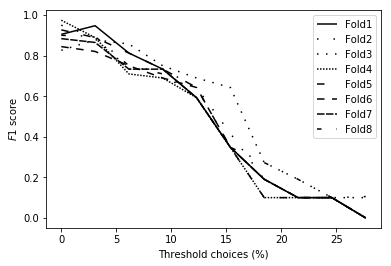

In [178]:
import matplotlib.pyplot as plt
from collections import OrderedDict
linestylesDict = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])
linestyles = []
for i, (name, linestyle) in enumerate(linestylesDict.items()):
    linestyles.append(linestyle)
print('Linestyles :',linestyles)

color = 'black'
plt.show()
for i in range(k):
    plt.plot(thresholds,f1[:,i],label = 'Fold'+str(i+1),linestyle=linestyles[i],color=color)
    #plt.plot(thresholds,precisions[:,i],label='precision',linestyle=linestyles[1],color=color)
    #plt.plot(thresholds,recalls[:,i],label='recall',linestyle=linestyles[2],color=color)
    plt.legend()
plt.xlabel('Threshold choices (%)')
plt.ylabel('$\it{F}$'+'1 score')
plt.show

Obtain test data and calculating evaluation metrics for testing

In [179]:
print('Normal test size :',normal_test_dates.shape)
print('Normal test dates :',normal_test_dates)

Normal test size : (38,)
Normal test dates : ['2010-12-04' '2010-11-12' '2011-02-14' '2011-03-16' '2011-05-24'
 '2011-05-20' '2011-03-15' '2011-02-09' '2011-06-02' '2010-11-09'
 '2011-01-03' '2011-03-11' '2010-12-07' '2010-12-18' '2011-05-29'
 '2011-01-05' '2011-03-06' '2010-12-05' '2010-11-30' '2010-11-24'
 '2010-12-27' '2011-02-18' '2011-01-06' '2010-12-29' '2011-02-23'
 '2011-05-13' '2011-04-15' '2011-01-16' '2011-02-01' '2011-06-08'
 '2011-03-18' '2011-05-17' '2011-04-13' '2010-12-31' '2010-12-21'
 '2011-06-11' '2010-12-02' '2010-11-05']


In [180]:
mTrainDates = train_dates[fold]
print("Seleted model fold's training data size:",mTrainDates.shape)
trainDf = df[df['Date'].isin(mTrainDates)].copy()
trainDf.index = np.arange(len(trainDf))
database = create_database(trainDf,period)

A_scores = []
N_scores = []

for i in range(len(normal_test_dates)):
    cf = df[df['Date'] == normal_test_dates[i]].copy()
    cf.index = np.arange(len(cf))
    N_scores.append(anomaly_score_daily(cf,database,period))
    abnormal_case = create_abnormal(df,normal_test_dates[i])
    A_scores.append(anomaly_score_daily(abnormal_case,database,period))
p,r,a = performance(N_scores,A_scores,threshold)
print('Precision :',p)
print('Recall :',r)
f1_score = 2*p*r/(p+r)
print('F1 :',f1_score)
print('Accuracy :',a)

Seleted model fold's training data size: (132,)
Normal size : 38
Abnormal size : 38
Precision : 0.9459459459459459
Recall : 0.9210526315789473
F1 : 0.9333333333333332
Accuracy : 0.9342105263157895
